# Task 2.  Algorithms for unconstrained nonlinear optimization. Direct methods

### 2.1 Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision $\varepsilon = 0.001$) solution $x: f(x) \rightarrow min $ for the following functions and domains:

### $1) f(x) = x^3, x \in [0, 1]$
### $2) f(x) = |x - 2|, x \in [0, 1]$
### $3) f(x) = x \sin{\frac{1}{x}}, x \in [0.01, 1]$

### Calculate the number of $f$-calculations and the number of iterations performed in each method and analyze the results. Explain differences (if any) in the results obtained.

In [174]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


#Initialization of functions and algorithms
def func_1(x):
    return x ** 3


def func_2(x):
    return abs(x - 2)


def func_3(x):
    
    try:
        ans =  x * np.sin(1 / x)
    except:
        ans = 1
        
    return ans

    

def exhaustive_search_min(func, left_boundary, right_boundary, eps):
    
    nodes_num = int(1 + (right_boundary - left_boundary) / eps)     # number of nodes in grid
    grid = np.linspace(left_boundary, right_boundary, nodes_num)    # grid of values of x
    
    func_call_count = 0                                             # function call counter (depends only on grid size)
    iter_num = 0                                                    # number of iterations (depends only on grid size)
    
    x_min = grid[0]                                                 # x_min = x from grid where function takes min value
    func_min = func(x_min)                                          # func_min = min value of function
    func_call_count += 1
        
    for i in range(1, nodes_num):
        
        func_curr = func(grid[i])
        func_call_count += 1
        iter_num += 1

        if func(grid[i]) < func_min:
            x_min = grid[i]
            func_min = func_curr
    
    return x_min, func_call_count, iter_num


def dichotomy_method_min(func, left_boundary, right_boundary, eps, delta = eps / 2):
                                                                    # let delta be eps / 2 by default
    func_call_count, iter_num = 0, 0                                # same counters, as in exhaustive_search_min
    a_i, b_i = left_boundary, right_boundary                        # left and right borders on i-th iterarion
    
    while abs(a_i - b_i) >= eps:
        
        x_1, x_2 = (a_i + b_i - delta) / 2, (a_i + b_i + delta) / 2
        
        if func(x_1) <= func(x_2):
            b_i = x_2                                               # if the minimum is on the left side
        else:
            a_i = x_1                                               # if the minimum is on the right side
            
        func_call_count += 2
        iter_num +=1

    return a_i, b_i, func_call_count, iter_num                      # x_min will be between a_i and b_i


def golden_section_min(func, left_boundary, right_boundary, eps):

    func_call_count, iter_num = 0, 0                                # same counters, as in exhaustive_search_min
    a_i, b_i = left_boundary, right_boundary                        # left and right borders on i-th iterarion
    delta = (3 - np.sqrt(5)) * (b_i - a_i) / 2

    while abs(a_i - b_i) >= eps:
        
        if not iter_num:                                            # this step for the 1-st iteration only 
            x_1, x_2 = a_i + delta, b_i - delta
            func_x_1, func_x_2 = func(x_1), func(x_2)
            func_call_count += 2
            
        if func_x_1 <= func_x_2:                                    # if the minimum is on the left side
            
            b_i = x_2
            x_2 = x_1
            func_x_2 = func_x_1
            
            delta = (3 - np.sqrt(5)) * (b_i - a_i) / 2
            x_1 = a_i + delta
            func_x_1 = func(x_1)
            
            func_call_count += 1
            
        else:                                                       # if the minimum is on the right side
            
            a_i = x_1
            x_1 = x_2
            func_x_1 = func_x_2
            
            delta = (3 - np.sqrt(5)) * (b_i - a_i) / 2
            x_2 = b_i - delta
            func_x_2 = func(x_2)
            
            func_call_count += 1

        iter_num += 1
        
    return a_i, b_i, func_call_count, iter_num                      # x_min will be between a_i and b_i


func_arr = [func_1, func_2, func_3]                                 #array  with functions
func_descr_arr = ['$f(x) = x^3$', '$f(x) = |x - 2|$', '$f(x) = x \cdot sin(\\frac{1}{x})$']
                                                                    #array with discriptions of functions for vizualization


# Testing
i = 2
left = 0.01
right = 1
eps = 1e-3

print('function ', func_descr_arr[i], '\n')
print('min via exhaustive search (x_min, func_calls, iterations) = ', exhaustive_search_min(func_arr[i], left, right, eps))
print('min via dichotomy method (x_min_left, x_min_right, func_calls, iterations) = ',\
      dichotomy_method_min(func_arr[i], left, right, eps))
print('min via golden section method (x_min_left, x_min_right, func_calls, iterations) = ',\
      golden_section_min(func_arr[i], left, right, eps))

function  $f(x) = x \cdot sin(\frac{1}{x})$ 

min via exhaustive search (x_min, func_calls, iterations) =  (0.223, 991, 990)
min via dichotomy method (x_min_left, x_min_right, func_calls, iterations) =  (0.22210473632812497, 0.22308789062499995, 22, 11)
min via golden section method (x_min_left, x_min_right, func_calls, iterations) =  (0.22235669058885382, 0.22308249665035265, 17, 15)


C:\Users\79312\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\79312\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sin


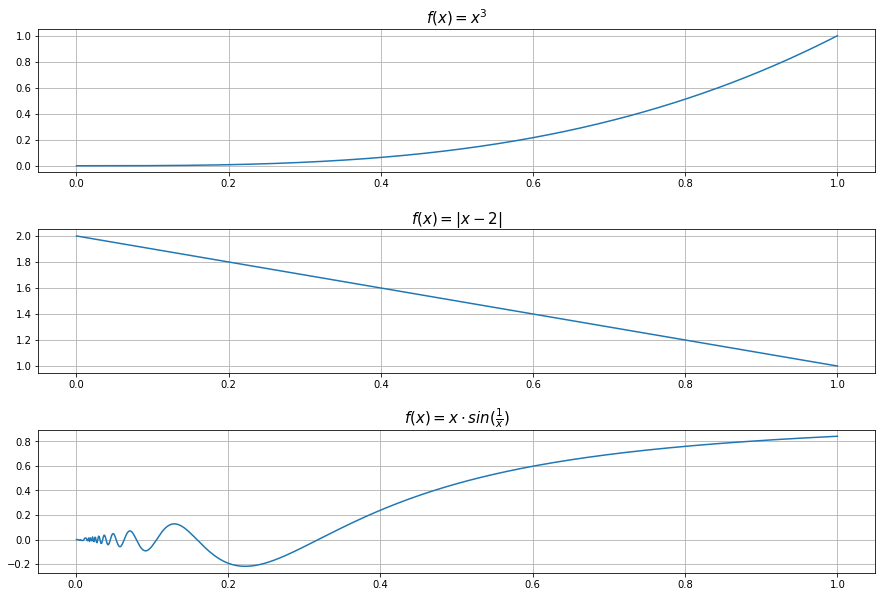

In [175]:
# Visualization of functions

fig = plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
x_arr = np.linspace(0, 1, 1000)

for func_num in range(3):

    plt.subplot(3, 1, func_num + 1)
    plt.plot(x_arr, func_arr[func_num](x_arr))
    plt.title(func_descr_arr[func_num], size = 15)
    plt.grid()
    
plt.show()